## Transformers
13/09/2020


## 1.1 Differences between RNNS and transformers

RNNs:
* Long range dependencies (but can be solved by using some attention)
* Gradient vanishing and explosion
* Large number of training steps
* Parallelization computation is also a challenge. With RNNs we have to do computations sequentially so GPUs cannot take advantage of parallelism of GPUs.

Transformers:
* No recurrence, and facilitate long range dependencies. So long term == short term.
* No more gradient vanishing and explosion. Computations for sequences are done together.
* Fewer training steps.
* No recurrence thus we can take advantage of GPUs.






### 1.2 Recap: what is the Attention Mechanism? 

It is kind of like a SELECT in a database. So we retrieve a value $v_i$ for a query $q$ based on a key $k_i$ in a database.  

Database example:

Database

| key | value   |
|------|------|
|   bob  | 32222|
|   dave  | 132|
|   john  | 12211|



Given a query **dave** then we get **132**.

So for a database

```python
def similarity(q, k_i):
    if q == k_i:
        return 1
    else:
        return 0
```

But attention uses probabilities thus it is not deterministic. For attention we have :
$$attention(q,[k],[v]) = \sum_i similarity(q, k_i) \times v_i$$






### 1.2.1 What is the similarity function?

What are some possibilities for NN similarity metrics in the above equation? So if we have $s_i = similarity(q,k_i)=f(q, k_i)$ we are some possibilities for $f$?

* Dot product: $q^T k_i$ 
* Scaled dot product ($d$ = dim(key)): $(q^T k_i)/\sqrt(d)$ 
* General dot product : $q^T W k_i$
* Additive similarity : $w^T_q q + w^T_k k_i$


So starting with a query $q$ and keys $k_i$, the similarity is then $s_i=f(q, k_i)$. After applying similarity for each key, apply softmax to $s_i$, so we have 

$$a_i= \frac{\exp(s_i)}{\sum_i \exp(s_i)}$$

Then multiply the above scores to get the values to get attention values $v_i$ for each key, or 

$$\sum_i a_i v_i$$

### 2.1 Transformers


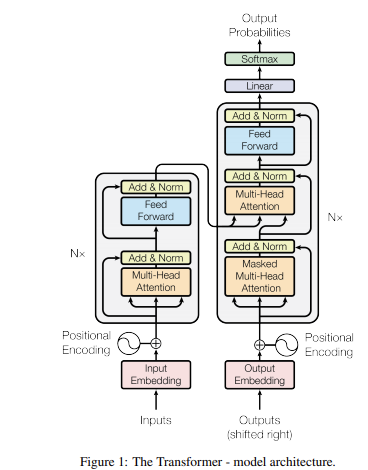


Vaswani et al (2017)



Transformers replaced alot of sequential models used. So the encoder will process an entire sentence in parallel. Then inputs will be an entire sentence of words. The positional encoding will tell the netowrk the positions of each word. 


The **Multi-Head** attention takes each word and combines with other words using the attention mechanism to produce a better embedding. The attention block is applied $N$ times to the sentence. So the first operation will look at pairs of words, then the second block will look at "pairs of pairs", and so-on.

The output of the encoder network is basically gives an encoding of each word at each position but also some information about other words.

The decoder block combines output words with previous output words. The first layer is self attention between output words. To generate sentences we have to use previous words to generate next word, so we only attend to previous words, and the masked attention will mask future words. Then we combine the encoder embeddings with output to kind of "look back" of the input sentence. 


### 2.1.1 Multihead attention

The **multi** in multihead is simply having multiple projections of $V,K,Q$. We can think of the number of heads $h$ like the number of filters in CNNs.


For each of the heads 1 to $h$ we have:
$$head_i = attention(W_i^Q Q, W_i^K K, W_i^V V)$$
where
$$attention(Q, K, V) = softmax\left(\frac{Q^T K}{\sqrt(d_k)}\right) V$$

Finally the final multihead attention found by concating all the heads and multiplying a matrix.

$$multihead(Q, K, V) = W^O concat(head_1,\dots, head_h)$$


### 2.1.1 Masked multihead attention

In the decoder the **masked** attention should only attend to previous outputs.

$$maskedAttention(Q, K, V) = softmax\left(\frac{Q^T K + M}{\sqrt(d_k)}\right) V$$

The matrix M only has 0's and -inf's. Let's see a simple example.

In [15]:
import numpy as np
a = np.array([0.2, 1.0, 0.5, 0.2 , 0.09])

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

b = softmax(a)

M = np.array([0, 0, 0, -np.inf, -np.inf])


b_masked = softmax(a + M)
print('softmax : {}'.format(b))
print('softmax masked : {}'.format(b_masked))

print(np.sum(b), np.sum(b_masked))

softmax : [0.15453004 0.34391292 0.20859373 0.15453004 0.13843328]
softmax masked : [0.21856014 0.48641453 0.29502533 0.         0.        ]
0.9999999999999998 0.9999999999999999




#### References
* https://www.youtube.com/watch?v=OyFJWRnt_AY
* https://arxiv.org/abs/1706.03762